In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from daskms import xds_to_table, xds_from_ms

import dask.array as da
import dask

ModuleNotFoundError: No module named 'daskms'

In [3]:
ms_file = '/Users/chrisfinlay/Documents/PhD/tabascal/tabascal/examples/data/calibrator_obs_08A_150T-0000-0298_128I_001F-1.227e+09-1.227e+09_001AST_1SAT_0GRD_test.ms/'
xds  = xds_from_ms(ms_file)

In [4]:
n_time = np.unique(xds[0].TIME.compute()).size
n_bl = xds[0].TIME.compute().size // n_time

In [5]:
n_time, n_bl

(150, 28)

In [6]:
corr_data = np.ones((1, n_bl, n_time)).astype(complex)
# corr_data = np.arange(n_time)[None,None,:]*corr_data

corr_data_flat = corr_data[0].T.flatten()

corr_data_ms = corr_data[0].T.flatten()[:,None,None]

/Users/chrisfinlay/mambaforge/envs/tabascal/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


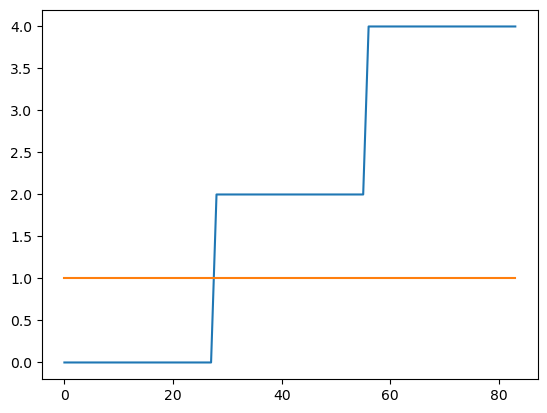

In [7]:
plt.plot(xds[0].TIME[:3*n_bl])
plt.plot(corr_data_flat[:3*n_bl])

In [10]:
(xds[0].DATA.compute()).mean().data

array(0.21906719+0.5605229j, dtype=complex64)

In [9]:
(xds[0].CORRECTED_DATA.compute()).mean().data

array(1.+0.j, dtype=complex64)

In [10]:
xds = [xds[0].assign(CORRECTED_DATA=(("row", "chan", "corr"), da.asarray(corr_data_flat[:,None,None]))),]
writes = xds_to_table(xds, ms_file, ["CORRECTED_DATA"])
dask.compute(writes)

([<xarray.Dataset>
  Dimensions:         (row: 1, chan: 1, corr: 1)
  Dimensions without coordinates: row, chan, corr
  Data variables:
      CORRECTED_DATA  (row, chan, corr) bool True
  Attributes:
      __daskms_partition_schema__:  (('FIELD_ID', 'int32'), ('DATA_DESC_ID', 'i...
      FIELD_ID:                     0
      DATA_DESC_ID:                 0],)

In [11]:
from daskms import xds_to_table, xds_from_ms

import dask.array as da
import dask


ms_file = '/Users/chrisfinlay/Documents/PhD/tabascal/tabascal/examples/data/calibrator_obs_08A_150T-0000-0298_128I_001F-1.227e+09-1.227e+09_001AST_1SAT_0GRD_test.ms/'
xds  = xds_from_ms(ms_file)



xds = [xds[0].assign(CORRECTED_DATA=(("row", "chan", "corr"), da.asarray(corr_data_flat[:,None,None]))),]
writes = xds_to_table(xds, ms_file, ["CORRECTED_DATA"])
dask.compute(writes)

([<xarray.Dataset>
  Dimensions:         (row: 1, chan: 1, corr: 1)
  Dimensions without coordinates: row, chan, corr
  Data variables:
      CORRECTED_DATA  (row, chan, corr) bool True
  Attributes:
      __daskms_partition_schema__:  (('FIELD_ID', 'int32'), ('DATA_DESC_ID', 'i...
      FIELD_ID:                     0
      DATA_DESC_ID:                 0],)

In [4]:
from ..tab_opt import image

ImportError: attempted relative import with no known parent package

In [ ]:
pd.re

In [ ]:
!ls /Users/chrisfinlay/Documents/PhD/tabascal/tabascal/examples/data/ta
